In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

<ipython-input-1-c58e38b25fb3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# **Supervised Learning**
Supervised learning (SL) is a machine learning task where a model learns to map inputs to outputs by using a dataset containing many examples of input-output pairs (training data). A classifier is an ML algorithm that learns this mapping function from the training data. Here's an example:

# Iris dataset


The IRIS dataset (https://www.mghassany.com/MLcourse/img/iris.png) is a famous dataset in machine learning and statistics, often used for testing algorithms. It consists of 150 samples of iris flowers, with **three different species**: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. Each sample has **four features**: *sepal length*, *sepal width*, *petal length*, and *petal width*. The goal is to classify the species of the iris flower based on these features.  
For the sake of visualization we will do a plot of the datapoints over the first two features:

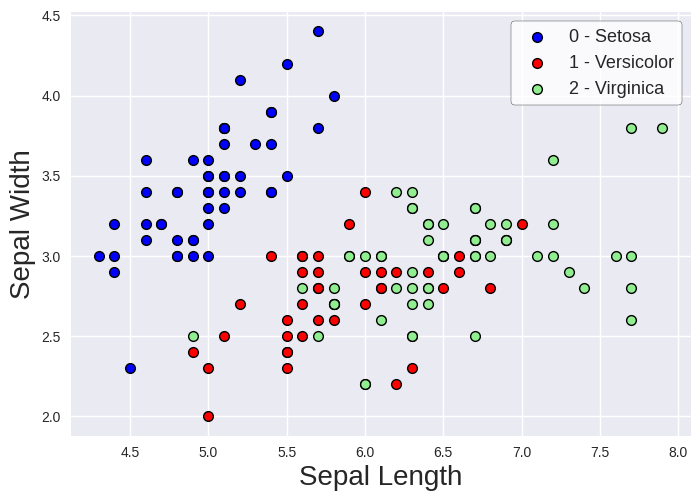

In [2]:
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
labels=['0 - Setosa', '1 - Versicolor', '2 - Virginica']

# Uncomment the following line to scale the petal width to millimeters
X[:,3] = X[:,3] * 100

# Plot the sepal length vs. sepal width for each Iris species
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='blue', linewidth=1, edgecolor='black', label='0 - Setosa')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='red', linewidth=1, edgecolor='black', label='1 - Versicolor')
plt.scatter(X[:, 0][y == 2], X[:, 1][y == 2], c='lightgreen', linewidth=1, edgecolor='black', label='2 - Virginica')

# Configure plot aesthetics
plt.rc('font', size=12)
plt.xlabel('Sepal Length', fontsize=20)
plt.ylabel('Sepal Width', fontsize=20)

# Add a legend to the plot
plt.legend(frameon=True, fontsize=13, facecolor='white', edgecolor='black')
plt.show()

# K-nearest Neighbors Classifier (k-NN)

Next, we aim to develop a classifier that can identify the type of flower based on a new feature vector. We'll explore one of the simplest classifiers available: the **K-Nearest Neighbors (KNN) Classifier**. This algorithm operates by searching the training data for the K points closest to the new data point, measured by Euclidean distance, and then assigns the label based on a majority vote among these nearest neighbors.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# Split the data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)

# Initialize the K-Nearest Neighbors classifier with K=10
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate and print the model's performance on the training and test data
print('Training accuracy =', knn.score(X_train, y_train))
print('Testing accuracy  =', knn.score(X_test, y_test))


Training accuracy = 0.9732142857142857
Testing accuracy  = 0.9210526315789473


We built our first classifier with a test score of 0.921—not bad! However, we made a critical mistake: we used a model without fully understanding how it works or what’s happening under the hood.

So, how does the K-Nearest Neighbors (KNN) classifier work?

Here’s a quick overview: when classifying a new data point, the algorithm searches the training data for the K nearest points based on Euclidean distance, then assigns the label based on a majority vote among these neighbors.

But there’s an issue here. Ideally, all features should be equally important, but in the calculation of Euclidean distances, features with larger numerical values dominate the influence. For example, when dealing with trees, differences in leaf length might be insignificant compared to differences in trunk length. In our case, *petal width* is measured in millimeters while other features are in centimeters, giving undue weight to that feature.

Now that we understand how the classifier works, we can fix this. The solution is simple: rescale all features so that they have a mean of $0$ and a standard deviation of $1$.


In [4]:
from sklearn import preprocessing

# Initialize the StandardScaler and fit it to the data
scaler = preprocessing.StandardScaler().fit(X)

# Apply the scaling transformation to the data
X_scaled = scaler.transform(X)

# Print the original feature values for comparison
print("Original feature values:")
print(X[0, :])

print("\nRe-scaled feture values:")
print(X_scaled[0, :])

# Print the scaled feature values after inverse transformation
print("\nFeature values after inverse transformation:")
print(scaler.inverse_transform(X_scaled)[0, :])


Original feature values:
[ 5.1  3.5  1.4 20. ]

Re-scaled feture values:
[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]

Feature values after inverse transformation:
[ 5.1  3.5  1.4 20. ]


Train and evaluate the model on the rescaled dataset:

In [5]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the K-Nearest Neighbors classifier with 10 neighbors
knn_scaled = neighbors.KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier using the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# Evaluate the classifier on the scaled test data and print the test score
print('Test accuracy =', knn_scaled.score(X_test_scaled, y_test))

Test accuracy = 0.9736842105263158


By understanding how the algorithm works, we increased our predictive performance by 5.2%!


The K-Nearest Neighbors Classifier can function as either a hard classifier, which assigns a single predicted class, or a soft classifier, which provides probabilities for each potential class.



In [6]:
# Transform a new trial sample using the fitted scaler
trial = scaler.transform(np.array([6, 3, 3, 200]).reshape(1, -1))  # This sample is in the gray zone between classes 1 and 2 on the plot

# Predict the class of the trial sample using the KNN classifier
result = knn_scaled.predict(trial)

# Output the hard classification result
print('Hard classification result:')
print(labels[result[0]])

# Output the soft classification probabilities
probabilities = knn_scaled.predict_proba(trial)[0]
print('Soft classification probabilities:')
print(f'P(Setosa) = {probabilities[0]:.4f}')
print(f'P(Versicolor) = {probabilities[1]:.4f}')
print(f'P(Virginica) = {probabilities[2]:.4f}')

Hard classification result:
1 - Versicolor
Soft classification probabilities:
P(Setosa) = 0.0000
P(Versicolor) = 0.6000
P(Virginica) = 0.4000


The hard classification is sure that the flower is a Versicolor but from the soft classification we see that he point was quite hard to classify. In the case of flowers this is not a big deal but in the following we will see how this can be extremely important.

# Breast Cancer Dataset

We will modify both the dataset and the classification algorithm. This dataset contains labeled information about breast clumps. It includes **9 features**, each scored as an integer between 1 and 10. The labels are: **2** for **benign clumps** and **4** for **malignant clumps**.

Wisconsin breast cancer data:
---
**Attribute Information:**

1. **Sample Code Number**: Identifier (not used as a feature)
2. **Clump Thickness**: Ranges from 1 to 10
3. **Uniformity of Cell Size**: Ranges from 1 to 10
4. **Uniformity of Cell Shape**: Ranges from 1 to 10
5. **Marginal Adhesion**: Ranges from 1 to 10
6. **Single Epithelial Cell Size**: Ranges from 1 to 10
7. **Bare Nuclei**: Ranges from 1 to 10
8. **Bland Chromatin**: Ranges from 1 to 10
9. **Normal Nucleoli**: Ranges from 1 to 10
10. **Mitoses**: Ranges from 1 to 10
11. **Class**: 2 indicates benign, 4 indicates malignant
---

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the dataset from the provided URL
dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
    header=None
)

# Assign column names to the dataset
dataset.columns = [
    'Id', 'Thickness', 'Unif.Size', 'Unif.Shape', 'Marginal_Ad.', 'S.E._Size',
    'Bare_Nuclei', 'Bl.Chrom.', 'Norm.Nucl.', 'Mitoses', 'Class'
]

# Extract feature values (X) and target labels (y)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Initialize index for iteration
i = 0

# Remove rows with missing data (represented by '?')
while i < X.shape[0]:
    if '?' in X[i, :]:
        X = np.delete(X, i, axis=0)  # Remove the row from X
        y = np.delete(y, i, axis=0)  # Remove the corresponding label from y
    else:
        i += 1  # Only increment if no deletion to avoid skipping rows

# Print the shape of the cleaned feature matrix
print("Dataset size: ", X.shape)

# Display the cleaned dataset
dataset

Dataset size:  (683, 9)


,Id,Thickness,Unif.Size,Unif.Shape,Marginal_Ad.,S.E._Size,Bare_Nuclei,Bl.Chrom.,Norm.Nucl.,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


 # Logistic Regression


We will be using **Logistic Regression** as our classification algorithm. Most machine learning algorithms involve manually set "*hyperparameters*", which are different from the model "*parameters*" that are learned from training data. Hyperparameters can significantly affect the model's performance and predictions. In machine learning, hyperparameter tuning is often used to address issues like overfitting. In this context, we'll see how understanding the algorithm allows us to adjust hyperparameters to achieve the desired outcomes.

**DISCLAIMER:** Tuning hyperparameters based on the test data is not allowed. The test data should remain unseen until the final evaluation of the model’s performance. All tuning and adjustments should be performed using the validation set.





In [8]:
# Split the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=1)

# Further split the temporary set into test (15%) and validation (15%) sets
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Print the number of samples in each set
print("Number of training samples: ", X_train.shape[0])
print("Number of validation samples: ", X_valid.shape[0])
print("Number of test samples: ", X_test.shape[0])

Number of training samples:  478
Number of validation samples:  103
Number of test samples:  102


Let's train a model using the **training** data and examine the confusion matrix on the **validation** set.

The confusion matrix provides more information than just the model's score. It reveals the counts of false negatives and false positives, giving us insight into the model's performance:

Confusion Matrix: 
 [[65  2]
 [ 2 34]]


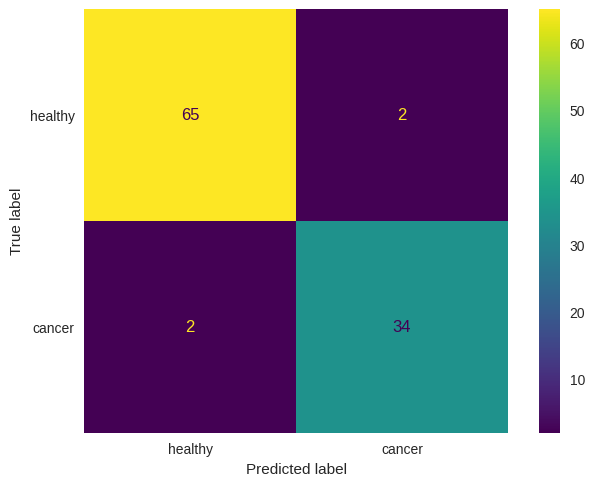

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and fit the logistic regression model on the training data
model_c = LogisticRegression()
model_c.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model_c.predict(X_valid)

# Calculate prediction probabilities
prob = model_c.predict_proba(X_valid)

# Generate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Print the confusion matrix
print("Confusion Matrix: \n", cm)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['healthy', 'cancer'])
disp.plot()

# Update plot settings
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()


The model demonstrates strong performance, with only **4 errors** out of **103 predictions**.

However, there's a critical issue: *the model incorrectly labels 2 individuals as healthy when they actually have cancer*. If a doctor relied on this model to determine who should receive treatment, this could have severe consequences for those individuals.

So, what can be done to address this problem?

Logistic regression can function as either a **hard** or **soft classifier**. The default setup we used is a hard classifier, which assigns the class label based on the highest probability:

$$\text{assign } Sick \text{ if }P(Sick)>0.5$$

To minimize the risk of misclassifying sick individuals as healthy, we can lower the classification threshold:

$$\text{assign } Sick \text{ if }P(Sick)>T$$

By setting $T$ lower than $0.5$, we will classify more individuals as sick, which can help reduce the number of sick people incorrectly labeled as healty, though it may increase the number of healty individuals misclassified as sick.

If we are not careful with our choice of $T$, we could compromise the predictive performance of the model.

Fortunately, we can evaluate the model’s performance on the validation set for various threshold values $T$ to find a suitable balance.


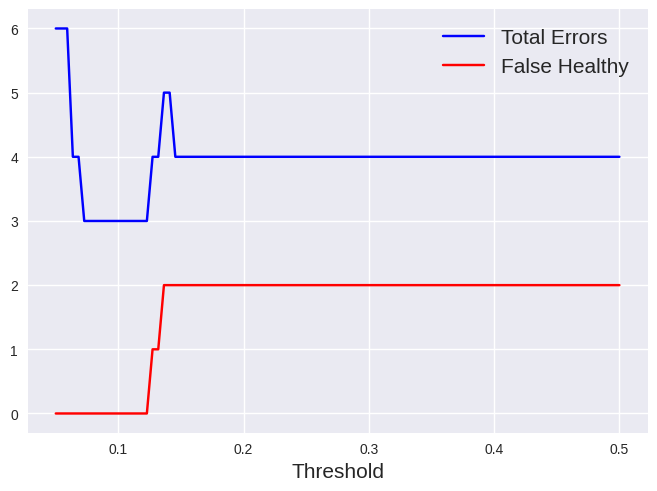

In [10]:
# Initialize arrays to store total errors and false healthy predictions
total_error = np.zeros(0)
false_healthy = np.zeros(0)

# Generate a range of threshold values from 0.05 to 0.5, divided into 100 points
threshold = np.linspace(0.05, 0.5, 100)

# Iterate over each threshold value
for thr in threshold:
    # Initialize the array to store predictions based on the current threshold
    y_treshold = np.zeros(X_valid.shape[0])

    # Assign predictions based on the threshold comparison
    for i in range(len(y_treshold)):
        if prob[i, 1] >= thr:
            y_treshold[i] = 4  # Predict "4" for positive class if probability exceeds threshold
        else:
            y_treshold[i] = 2  # Predict "2" for negative class otherwise

    # Compute the confusion matrix for the current threshold
    cm = confusion_matrix(y_valid, y_treshold)

    # Store the total number of errors (false positives + false negatives)
    total_error = np.append(total_error, cm[0, 1] + cm[1, 0])

    # Store the number of false negative predictions ("healthy" misclassified)
    false_healthy = np.append(false_healthy, cm[1, 0])

# Plot total errors and false healthy predictions against the threshold values
plt.plot(threshold, total_error, c='blue', label='Total Errors')
plt.plot(threshold, false_healthy, c='red', label='False Healthy')
plt.xlabel('Threshold', fontsize=15)
plt.legend(loc="upper right", fontsize=15);

By setting $T = 0.1$, we achieve $0$ **false negatives** and only $3$ **false **testo in grassetto** positives**. This adjustment also decreases the total error from $4/103$ to $3/103$, thereby reducing the overall error rate (though this may not always be the case).

As a final step, we can now examine the confusion matrix on the **test set**:

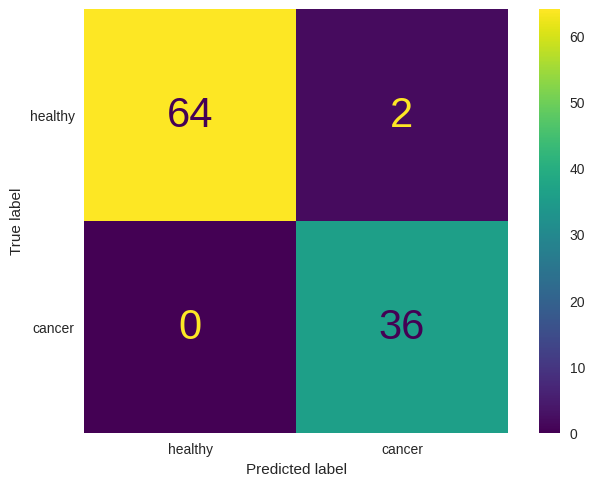

In [11]:
# Predict probabilities for the test set
prob = model_c.predict_proba(X_test)

# Initialize an array to store predictions based on the threshold
y_treshold = np.zeros(X_test.shape[0])

# Assign predictions using a threshold of 0.1
for i in range(len(prob)):
    if prob[i, 1] >= 0.1:
        y_treshold[i] = 4  # Predict "4" for the positive class if probability is 0.1 or higher
    else:
        y_treshold[i] = 2  # Predict "2" for the negative class otherwise

# Calculate and display the confusion matrix for the test set
cm = confusion_matrix(y_test, y_treshold)
disp = ConfusionMatrixDisplay(cm, display_labels=['healthy', 'cancer'])
disp.plot()

# Update plot settings for better readability
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()


We are super happy about the result! Just for reference, let's check the confusion matrix if we stayed with the **original model**:



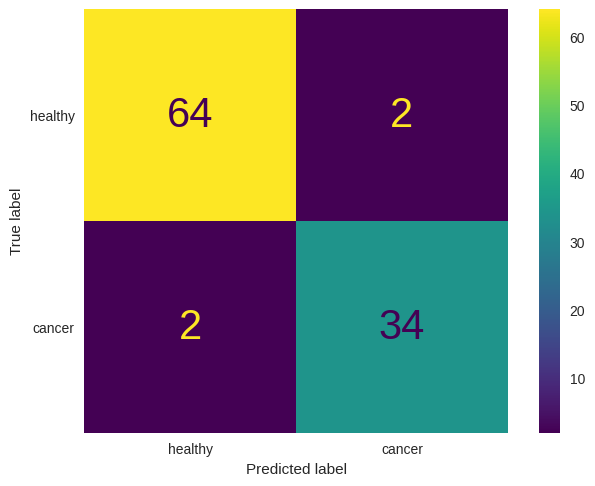

In [12]:
y_pred = model_c.predict(X_test)                           #making prediction on validation
cm = confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(cm, display_labels=['healthy','cancer'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

We still have two false negatives! This confirms that we made the right decision. This example clearly demonstrates that **having a solid understanding of the model we're using is crucial!**

# **Exercise 1:** Image Recognition


The data consists of tic-tac-toe endgame grids.

We have records for $958$ games, where each grid is represented as a $9$-dimensional vector. The first row of the grid corresponds to the first $3$ components, the second row to components $4$ through $6$, and the last row to components $7$ through $9$. The elements of the vector are "$x$" for a cross, "$o$" for a circle, and "$b$" for an empty space.

Each grid is labeled to indicate whether the cross won (positive) or not (negative).


In [13]:
# Load the dataset from the provided URL
dataset = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", header=None)

# Separate features (X) and labels (y)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Convert the grid elements to numerical values
for i in range(len(X[:, 1])):
    for j in range(len(X[1, :])):
        if X[i, j] == 'o':
            X[i, j] = -1
        elif X[i, j] == 'x':
            X[i, j] = 1
        elif X[i, j] == 'b':
            X[i, j] = 0

# Convert X to integer type
X = X.astype('int')

# Convert the labels to numerical values
for i in range(len(y)):
    if y[i] == 'negative':
        y[i] = 0
    elif y[i] == 'positive':
        y[i] = 1

# Convert y to integer type
y = y.astype('int')

Here, we converted the data into numerical values to facilitate the analysis.

1. We used $1$ for $x$, $0$ for $b$, and $-1$ for $o$. Could we have instead used values like $5$ for $x$, $1$ for $b$, and $0$ for $o$? Why or why not?
2. Find a way to visualize the $3\times3$ grids (it's not necessary to use crosses and circles; the different states just need distinct representations).
3. Train a model to identify if the cross wins based on the grid. What is the model's performance? Plot the confusion matrix.
4. Suppose we can only store a 3-dimensional vector for each grid due to memory constraints. Reduce the dimensionality of the data to $3$ using PCA, train a model on this projection, and observe the performance. What changes and why? Plot the confusion matrix.
5. How could we adjust our model to reduce false positives or false negatives?
6. For Logistic Regression applied to tic-tac-toe grids, consider visualizing the weights assigned to each grid cell. What insights can be drawn from this analysis?

# Solution Exercise 1:

### solution 1.1

We cannot use $5$ for $x$, $1$ for $o$, and $0$ for $b$ because this would introduce a hierarchical distance between the states. Using $1$, $-1$, and $0$ ensures that both $x$ and $o$ are equidistant from the *'null'* state, which is generally a better practice.

Another option is to one-hot encode the data, using $10$ for $x$, $01$ for $o$, and $00$ for $b$. This encoding is equivalent to using $1$, $-1$, and $0$ for distance-based algorithms. However, for algorithms like logistic regression, it differs slightly because one-hot encoding doubles the dimensionality of the data, resulting in a weight vector $w$ with twice as many components.

### solution 1.2

We use the same approach as with the digits dataset, but with a $3 \times 3$ grid. Specifically, in this grid, $1$ will be represented as black, $-1$ as white, and $0$ as grey.

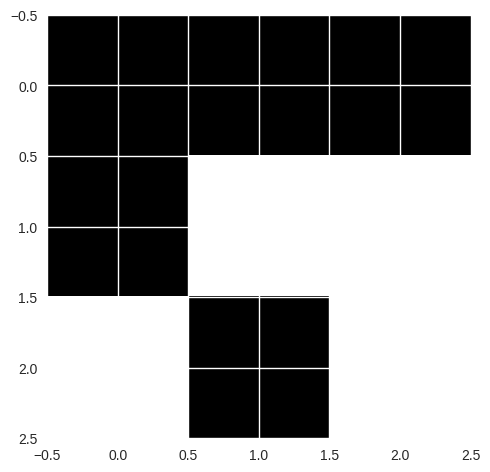


The label is 1 indicating that x wins.



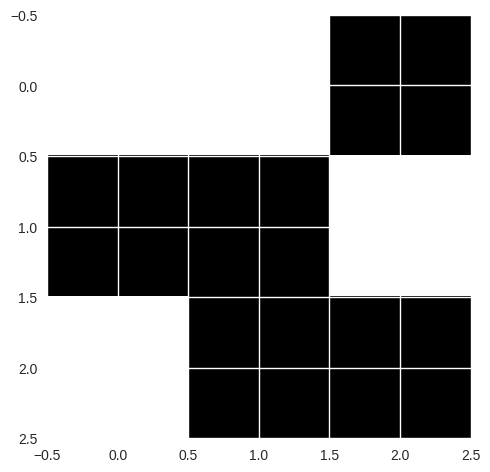


The label is 0 indicating that x does not win.


In [14]:
# Display the first grid as a 3x3 image and show the result
plt.imshow(X[1, :].reshape((3, 3)))
plt.show()
print('\nThe label is', y[1], 'indicating that x wins.\n')

# Display the last grid as a 3x3 image and show the result
plt.imshow(X[-1, :].reshape((3, 3)))
plt.show()
print('\nThe label is', y[-1], 'indicating that x does not win.')

### solution 1.3
Random Forest & Logistic Regression

Confusion Matrix for Logistic Regression: 
 [[ 96   8]
 [  0 184]]


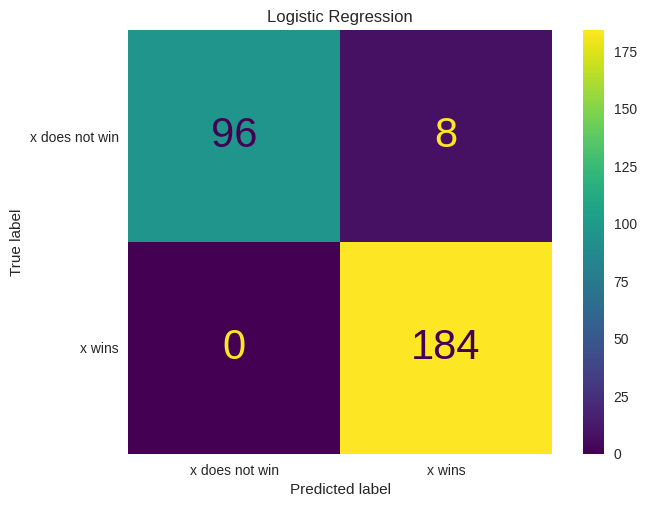

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Initialize the Logistic Regression with specified parameters
model_LR = LogisticRegression()

# Train the model on the training data
model_LR.fit(X_train, y_train)

# Make predictions on the test data
y_pred_LR = model_LR.predict(X_test)

# Obtain the predicted probabilities for the test data
prob_LR = model_LR.predict_proba(X_test)

# Compute the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression: \n", cm_LR)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm_LR, display_labels=['x does not win', 'x wins'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.title("Logistic Regression")
plt.show()

Let's compare with Random Forest:

Confusion Matrix for Random Forest Classifier: 
 [[ 97   7]
 [  0 184]]


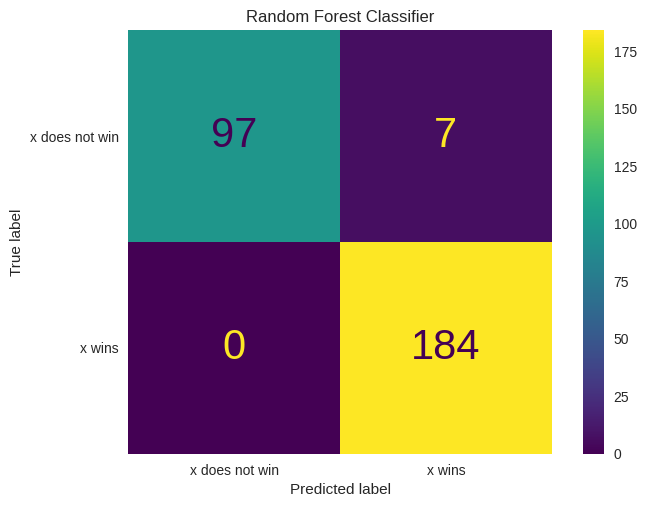

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=40, max_depth=15, random_state=3)
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)
prob_RFC = model_RFC.predict_proba(X_test)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Confusion Matrix for Random Forest Classifier: \n", cm_RFC)
disp = ConfusionMatrixDisplay(cm_RFC, display_labels=['x does not win', 'x wins'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.title("Random Forest Classifier")
plt.show()

### solution 1.3 (BONUS)
Let's experiment with one-hot encoding:

[[ 96   8]
 [  0 184]]


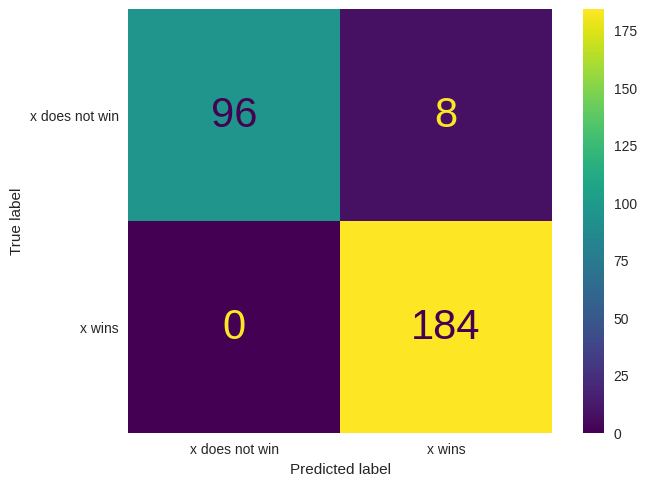

In [17]:
# Initialize the one-hot encoded feature matrix
X_ohe = np.zeros((len(X[:, 1]), 2 * len(X[1, :])))

# Populate the one-hot encoded feature matrix
for i in range(len(X[:, 1])):
    for j in range(len(X[1, :])):
        if X[i, j] == 1:
            X_ohe[i, 2 * j + 1] = 1
        elif X[i, j] == -1:
            X_ohe[i, 2 * j] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.30, random_state=1)

# Initialize and train the LogisticRegression or RandomForestClassifier
model_c = LogisticRegression() # RandomForestClassifier(n_estimators=40, max_depth=15, random_state=3)
model_c.fit(X_train, y_train)

# Make predictions and obtain predicted probabilities
y_pred = model_c.predict(X_test)
prob = model_c.predict_proba(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(cm, display_labels=['x does not win', 'x wins'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

In this instance, there are no differences.

**Remember:** if you're conducting this type of analysis, always use the validation set for decision-making. Never adjust parameters based on the test set!

### solution 1.4

First, let’s examine how the variance is distributed along the principal directions:

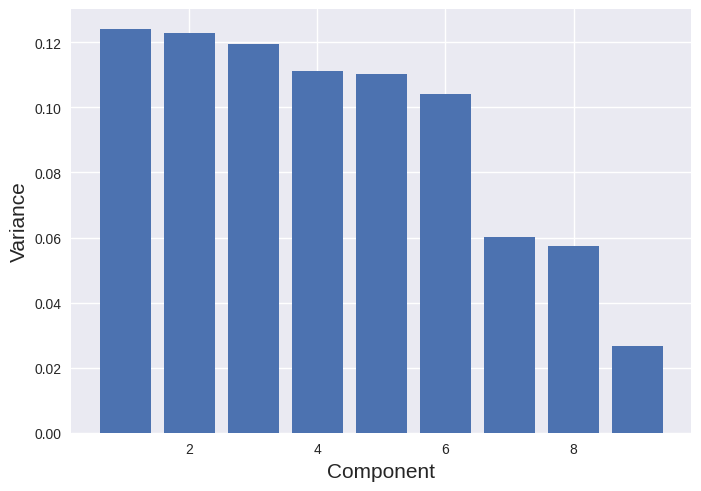

In [18]:
from sklearn.decomposition import PCA

# Initialize PCA to keep 9 principal components
pca = PCA(n_components=9)

# Fit PCA on the training data
pca.fit(X_train)

# Obtain the variance explained by each principal component
variances = pca.explained_variance_ratio_

# Plot the variance explained by each principal component
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], variances)
plt.xlabel('Component', fontsize=15)
plt.ylabel('Variance', fontsize=15)
plt.show()

Indeed, the variance is quite evenly distributed. Thus, if we only use the first few principal components, we will lose a significant amount of information.

Confusion Matrix: 
 [[ 18  86]
 [ 10 174]]


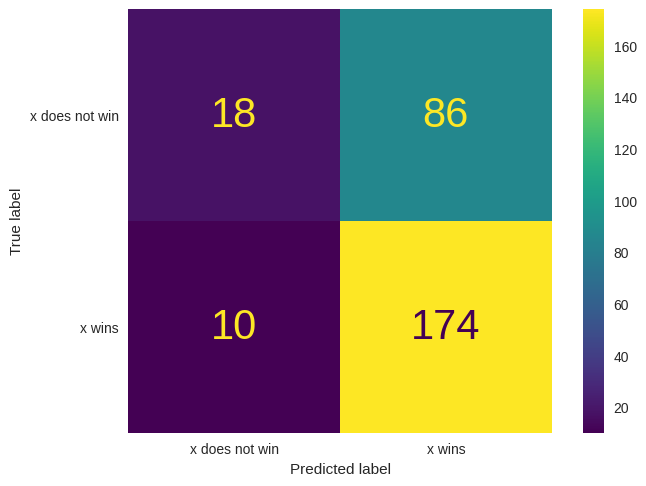

Accuracy:  0.6666666666666666


In [19]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Initialize PCA to reduce the data to 3 principal components
pca = PCA(n_components=3)

# Project the training and testing data onto the first 3 principal components
X_train_proj = pca.fit_transform(X_train)
X_test_proj = pca.transform(X_test)

# Initialize and train the LogisticRegression or RandomForestClassifier
model_c = LogisticRegression() # RandomForestClassifier(n_estimators=40, max_depth=15, random_state=3)
model_c.fit(X_train_proj, y_train)

# Make predictions and obtain predicted probabilities
y_pred = model_c.predict(X_test_proj)
prob = model_c.predict_proba(X_test_proj)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['x does not win', 'x wins'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

print("Accuracy: ", model_c.score(X_test_proj, y_test))

Indeed, the performance is quite poor.

### solution 1.5

To reduce the number of **false positives**, we can follow the same approach used for the breast cancer dataset, which involves introducing a validation set.

Unfortunately, since there are no false positives to begin with, we should apply the same strategy to minimize false negatives instead.

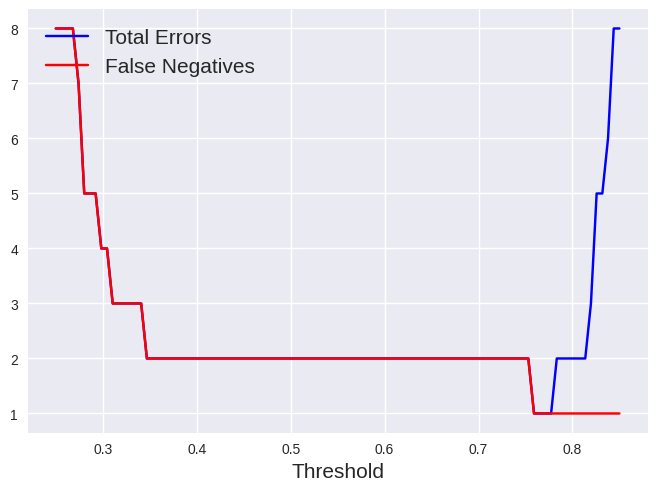

In [25]:
# Split the data into training and temporary sets, then split the temporary sets into test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)  # 15% for test and 15% for validation

# Initialize and train the RandomForestClassifier
model_c = LogisticRegression() #RandomForestClassifier(n_estimators=40, max_depth=15, random_state=3)
model_c.fit(X_train, y_train)

# Make predictions and obtain predicted probabilities on the validation set
y_pred = model_c.predict(X_valid)
prob = model_c.predict_proba(X_valid)

# Compute the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)

# Initialize arrays to store total errors and false negatives
total_error = np.zeros(0)
false_negative = np.zeros(0)
threshold = np.linspace(0.25,0.85,100)#(0.41, 0.73, 100)

# Create an array to hold thresholded predictions
y_threshold = np.zeros(X_valid.shape[0])

# Evaluate performance across different probability thresholds
for thr in threshold:
    y_threshold = np.zeros(X_valid.shape[0])
    for i in range(len(y_threshold)):
        if prob[i, 1] >= thr:
            y_threshold[i] = 1
        else:
            y_threshold[i] = 0
    cm = confusion_matrix(y_valid, y_threshold)
    total_error = np.append(total_error, cm[0, 1] + cm[1, 0])
    false_negative = np.append(false_negative, cm[0, 1])

# Plot the total errors and false negatives against the threshold values
plt.plot(threshold, total_error, c='blue', label='Total Errors')
plt.plot(threshold, false_negative, c='red', label='False Negatives')
plt.xlabel('Threshold', fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

### solution 1.6

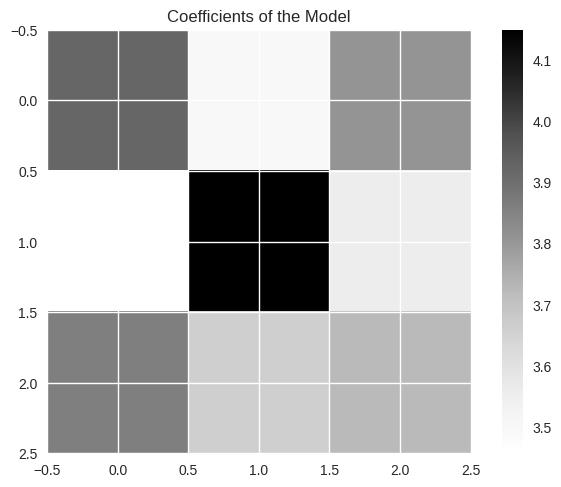

In [21]:
vis = model_c.coef_.reshape(3, 3)

# Visualize the weights of model
plt.imshow(vis)
plt.colorbar()
plt.title('Coefficients of the Model')
plt.show()